In [1]:
# Ignore cuDDa warning messages
import warnings
import os
warnings.filterwarnings('ignore')

# Enable GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# # Expands the Jupyter Notebook Output Size to fit your window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Change the working directory back to the original to keep paths the same between files
os.chdir(r'C:\Users\Maxwell\PycharmProjects\TAMU-ECEN-403-IFPTSND\ECEN_403_IFM\TAMU-ECEN-403-IFPTSND')

# warnings.filterwarnings('ignore')
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [3]:
# Import all of my custom files
from tensorflow_models import *
from explore_entities import *
from graph_predictions import *

In [4]:
# Create our model generator object
dataset_path = './ignorable_data/data_sets/NASDAQ_Cleaned - Contains ZUMZ/'
model_path = './ignorable_data/models/[40, 40, 20]_split/'
DMJ = TF_Models(dataset_path, model_path, reload=False, perc_split=[2,2,96])

In [5]:
# Create a model
DMJ.generate_model()

GridBox(children=(Dropdown(description='Model Types:', options=('lstm', 'explicit_gcn', 'implicit_gcn', 'lstm_…

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 5)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 24, 16)            1408      
_________________________________________________________________
dense (Dense)                (None, 24, 1)             17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
5/5 [==============================] - 0s 99ms/step - loss: 1.1031 - val_loss: 1.0342
Epoch 2/30
5/5 [==============================] - 0s 98ms/step - loss: 0.9299 - val_loss: 0.6667
Epoch 3/30
5/5 [==============================] - 1s 111ms/step - loss: 0.5160 - val_loss: 0.2900
Epoch 4/30
5/5 [==============================] - 1s 101ms/step - loss: 0.2139 - val_loss: 0.1329
Epoch 5/30
5/5 [==============================] - 1s 101ms/step - loss: 0.1412 - val_loss: 0.1706
Epoch 6/30
5/5 [==============================] - 0s 96ms/step - loss: 0.1679 - val_loss: 0.1491
Epoch 7/30
5/5 [==============================] - 1s 111ms/step - loss: 0.1326 - val_loss: 0.1077
Epoch 8/30
5/5 [==============================] - 0s 93ms/step - loss: 0.1037 - val_loss: 0.0974
Epoch 9/30
5/5 [==============================] - 0s 94ms/step - loss: 0.0989 - val_loss: 0.0970
Epoch 10/30
5/5 [==============================] - 1s 110ms/step - loss: 0.0969 - val_loss: 0.0916
Epoch 11/30
5/5 [=======

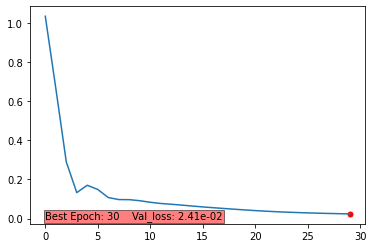

In [6]:
# Train a model
DMJ.train(epochs=30, batch_size=200)

In [7]:
# Save the model
DMJ.save_model()
print(DMJ.model_name)

04-20-2021--23--42-lstm-30Epochs-rank_loss-16HU-


In [8]:
# Create an object for creating models
GP = Graph_Predictions(model_path,  DMJ)

In [ ]:
# Where the prediction will be saved
prediction_path = './ignorable_data/prediction_results/'

model_name = DMJ.model_name

# The data that the model is able to see
past = DMJ.data_splits['x_val']

# The data that the model will predict over and incrementally see
future = DMJ.data_splits['x_test']

# The size of the time-window
window = DMJ.data_splits['x_val'].shape[1]

# Generate the predictions for every company on every day
# GP.generate_predictions(model_name, model_path, past, future, prediction_path, window, model_type='lstm', batch_size=881)
# model_name='04-20-2021--22--51-explicit_gcn-100Epochs-rank_loss-32HU-'
GP.generate_predictions(model_name, model_path, past, future, prediction_path, window, model_type='gcn', batch_size=881, input_Adj_matrix=DMJ.Normalized_Adjacency_Matrix)

In [ ]:
datablock_path = './ignorable_data/datablocks/[55, 25, 20]_splits/'
prediction_file = GP.most_recent_prediction_file

# Using the prediction file, execute trading strategies over the dataset
GP.generate_prediction_results_avg(5, prediction_file, prediction_path, future, datablock_path)

In [ ]:
# General Stats
GP.compare_data_blocks(datablock_path)

Feature 0, perturbation effect: 0.0123
Feature 1, perturbation effect: 0.0099
Feature 2, perturbation effect: 0.0129
Feature 3, perturbation effect: 0.0046
Feature 4, perturbation effect: 0.0484


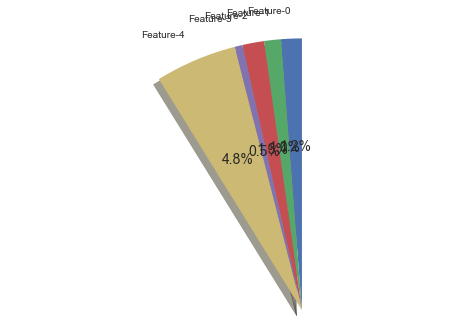

[0.012332151054716292,
 0.009943618880074617,
 0.01292765840047587,
 0.004592670945288877,
 0.048434965871078685]

In [9]:
# Advanced Interpretablility
GP.perturbate_sequential_model(DMJ.model_name, model_path, DMJ.data_splits['x_train'])